### **Importación de datos**



In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### **Conjunto de datos**

In [76]:
print("\n INFORMACIÓN GENERAL DE LOS DATOS:")
print(f"\nTienda 1: {tienda1.shape[0]} registros, {tienda1.shape[1]} columnas")
print(f"Tienda 2: {tienda2.shape[0]} registros, {tienda2.shape[1]} columnas")
print(f"Tienda 3: {tienda3.shape[0]} registros, {tienda3.shape[1]} columnas")
print(f"Tienda 4: {tienda4.shape[0]} registros, {tienda4.shape[1]} columnas")


 INFORMACIÓN GENERAL DE LOS DATOS:

Tienda 1: 2359 registros, 12 columnas
Tienda 2: 2359 registros, 12 columnas
Tienda 3: 2359 registros, 12 columnas
Tienda 4: 2358 registros, 12 columnas


In [77]:
tienda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [78]:
print("\n COLUMNAS DISPONIBLES:")
tienda1.columns.tolist()


 COLUMNAS DISPONIBLES:


['Producto',
 'Categoría del Producto',
 'Precio',
 'Costo de envío',
 'Fecha de Compra',
 'Vendedor',
 'Lugar de Compra',
 'Calificación',
 'Método de pago',
 'Cantidad de cuotas',
 'lat',
 'lon']

## **ANÁLISIS DE ALURA STORE - RECOMENDACIÓN DE VENTA**


###Objetivo: Ayudar al Sr. Juan a decidir qué tienda vender para invertir en nuevo negocio

#1. Análisis de facturación



In [79]:
ingreso1 = tienda1['Precio'].sum()
ingreso2 = tienda2['Precio'].sum()
ingreso3 = tienda3['Precio'].sum()
ingreso4 = tienda4['Precio'].sum()

print(f"💰 Tienda 1: ${ingreso1:,.0f} pesos")
print(f"💰 Tienda 2: ${ingreso2:,.0f} pesos")
print(f"💰 Tienda 3: ${ingreso3:,.0f} pesos")
print(f"💰 Tienda 4: ${ingreso4:,.0f} pesos")

ingresos = [ingreso1, ingreso2, ingreso3, ingreso4]
mejor_ingreso = max(ingresos)
peor_ingreso = min(ingresos)
tienda_mejor_ing = ingresos.index(mejor_ingreso) + 1
tienda_peor_ing = ingresos.index(peor_ingreso) + 1

print(f"\n✅ Tienda {tienda_mejor_ing} generó MÁS dinero")
print(f"❌ Tienda {tienda_peor_ing} generó MENOS dinero")

💰 Tienda 1: $1,150,880,400 pesos
💰 Tienda 2: $1,116,343,500 pesos
💰 Tienda 3: $1,098,019,600 pesos
💰 Tienda 4: $1,038,375,700 pesos

✅ Tienda 1 generó MÁS dinero
❌ Tienda 4 generó MENOS dinero


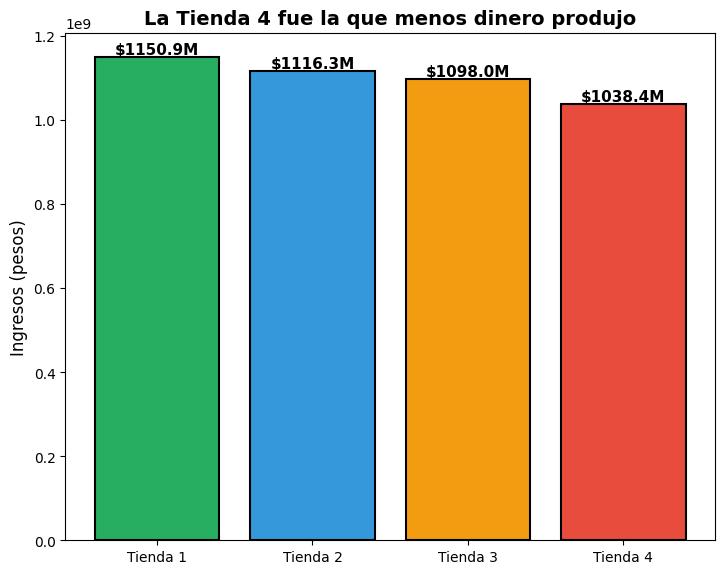

In [80]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#27ae60', '#3498db', '#f39c12','#e74c3c']
bars = plt.bar(tiendas, ingresos, color=colores, edgecolor='black', linewidth=1.5)
plt.title('La Tienda 4 fue la que menos dinero produjo', fontsize=14, fontweight='bold')
plt.ylabel('Ingresos (pesos)', fontsize=12)

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h,
             f'${h/1e6:.1f}M',
             ha='center', va='bottom', fontsize=11, fontweight='bold')
    # 💾 Guardar el gráfico como imagen PNG
plt.tight_layout()
plt.savefig('grafico1_ingresos_tiendas.png', dpi=300, bbox_inches='tight')


### se coloca los colores para que se pueda identificar que:
###1. el color verde: representa que el mayor ingreso fue en la tienda 1
###2. el color azul: representa que ingreso esta neutro fue en la tienda 2
###3. el color amariilo: representa que ingreso esta debajo, pero puede mejorar fue en la tienda 3
###4. el color rojo: representa que el menor ingreso fue en la tienda 4
### en conclusion  la tienda 4 genero menos dinero


# 2. Ventas por categoría

In [81]:

print("Qué tipo de productos se venden más en cada tienda:\n")

print("\nLas 3 categorías con más ventas en la Tienda 1 fueron:")
cat1 = tienda1['Categoría del Producto'].value_counts().head(3)
for i, (cat, cant) in enumerate(cat1.items(), 1):
    print(f"  {i}. {cat}: {cant} productos")

print("\nLas 3 categorías con más ventas en la Tienda 2 fueron:")
cat2 = tienda2['Categoría del Producto'].value_counts().head(3)
for i, (cat, cant) in enumerate(cat2.items(), 1):
    print(f"  {i}. {cat}: {cant} productos")

print("\nLas 3 categorías con más ventas en la Tienda 3 fueron:")
cat3 = tienda3['Categoría del Producto'].value_counts().head(3)
for i, (cat, cant) in enumerate(cat3.items(), 1):
    print(f"  {i}. {cat}: {cant} productos")

print("\nLas 3 categorías con más ventas en la Tienda 4 fueron:")
cat4 = tienda4['Categoría del Producto'].value_counts().head(3)
for i, (cat, cant) in enumerate(cat4.items(), 1):
    print(f"  {i}. {cat}: {cant} productos")

Qué tipo de productos se venden más en cada tienda:


Las 3 categorías con más ventas en la Tienda 1 fueron:
  1. Muebles: 465 productos
  2. Electrónicos: 448 productos
  3. Juguetes: 324 productos

Las 3 categorías con más ventas en la Tienda 2 fueron:
  1. Muebles: 442 productos
  2. Electrónicos: 422 productos
  3. Juguetes: 313 productos

Las 3 categorías con más ventas en la Tienda 3 fueron:
  1. Muebles: 499 productos
  2. Electrónicos: 451 productos
  3. Juguetes: 315 productos

Las 3 categorías con más ventas en la Tienda 4 fueron:
  1. Muebles: 480 productos
  2. Electrónicos: 451 productos
  3. Juguetes: 338 productos


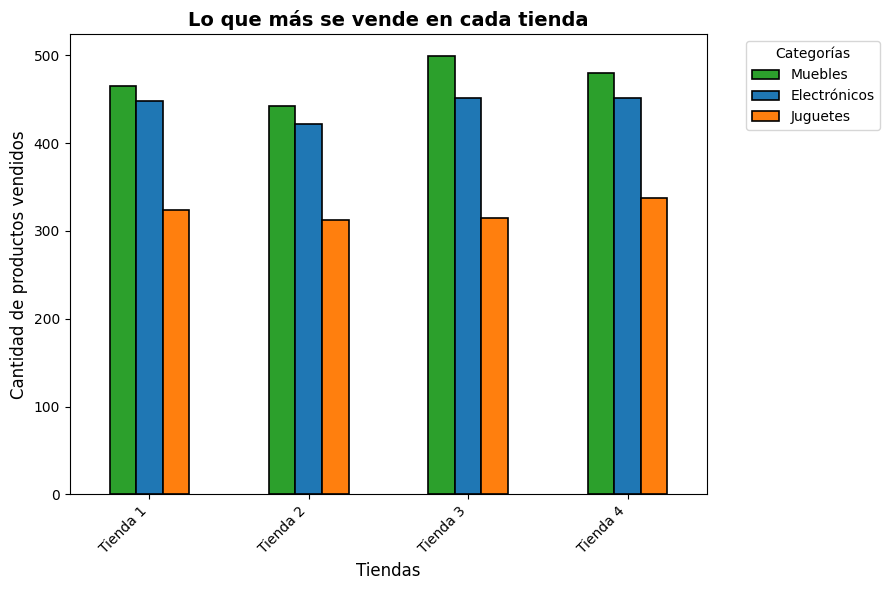

In [82]:
plt.figure(figsize=(9,6))

# Colores que coinciden con la imagen
colors = ['#2ca02c', '#1f77b4', '#ff7f0e']  # Verde,Azul, Naranja

# Transponer el DataFrame para invertir filas y columnas
ax = df_top.T.plot(kind='bar',
                   color=colors,
                   edgecolor='black',
                   linewidth=1.2,
                   ax=plt.gca())

plt.title("Lo que más se vende en cada tienda", fontsize=14, fontweight='bold')
plt.ylabel("Cantidad de productos vendidos", fontsize=12)
plt.xlabel("Tiendas", fontsize=12)

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Colocar la leyenda fuera del gráfico a la derecha
plt.legend(title="Categorías", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
# 💾 Guardar el gráfico como imagen PNG
plt.tight_layout()
plt.savefig('grafico2_categorias_populares.png', dpi=300, bbox_inches='tight')

plt.show()

####En todas las tiendas, las tres categorías con más ventas son Muebles, Electrónicos y Juguetes, siendo los Muebles los más vendidos en todos los casos,Esto muestra una tendencia estable de preferencia del cliente en toda las tiendas.

# 3. Calificación promedio de la tienda


In [84]:

print("\n" + "="*60)
print(" ¿QUÉ TAN CONTENTOS ESTÁN LOS CLIENTES?")
print("="*60)
print("(Calificación de 1 a 5 estrellas - 5 es excelente)")
print()

calif_t1 = tienda1['Calificación'].mean()
calif_t2 = tienda2['Calificación'].mean()
calif_t3 = tienda3['Calificación'].mean()
calif_t4 = tienda4['Calificación'].mean()

def mostrar_estrellas(calificacion):
    estrellas = int(round(calificacion))
    return "⭐" * estrellas + "☆" * (5 - estrellas)

print(f"Tienda 1: {calif_t1:.2f} {mostrar_estrellas(calif_t1)}")
print(f"Tienda 2: {calif_t2:.2f} {mostrar_estrellas(calif_t2)}")
print(f"Tienda 3: {calif_t3:.2f} {mostrar_estrellas(calif_t3)}")
print(f"Tienda 4: {calif_t4:.2f} {mostrar_estrellas(calif_t4)}")

calificaciones = {
    'Tienda 1': calif_t1,
    'Tienda 2': calif_t2,
    'Tienda 3': calif_t3,
    'Tienda 4': calif_t4
}

mejor_calif = max(calificaciones, key=calificaciones.get)
peor_calif = min(calificaciones, key=calificaciones.get)
print(f"\n✅ {mejor_calif} tiene los clientes MÁS contentos")
print(f"❌ {peor_calif} tiene los clientes MENOS contentos")


 ¿QUÉ TAN CONTENTOS ESTÁN LOS CLIENTES?
(Calificación de 1 a 5 estrellas - 5 es excelente)

Tienda 1: 3.98 ⭐⭐⭐⭐☆
Tienda 2: 4.04 ⭐⭐⭐⭐☆
Tienda 3: 4.05 ⭐⭐⭐⭐☆
Tienda 4: 4.00 ⭐⭐⭐⭐☆

✅ Tienda 3 tiene los clientes MÁS contentos
❌ Tienda 1 tiene los clientes MENOS contentos


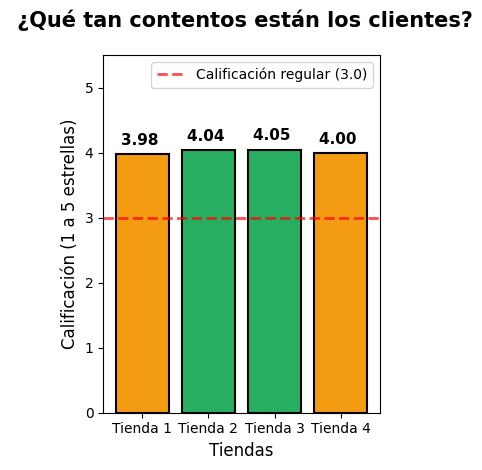

In [85]:
plt.subplot(1, 2, 2)
valores_calif = [calif_t1, calif_t2, calif_t3, calif_t4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Define colors based on rating
colores_calif = []
for calif in valores_calif:
    if calif < 3.5: # Define your thresholds
        colores_calif.append('#e74c3c') # Red for low rating
    elif calif < 4.0:
        colores_calif.append('#f39c12') # Orange for medium rating
    else:
        colores_calif.append('#27ae60') # Green for high rating


bars = plt.bar(tiendas, valores_calif, color=colores_calif, edgecolor='black', linewidth=1.5)
plt.title(' ¿Qué tan contentos están los clientes?', fontsize=15, fontweight='bold', pad=20)
plt.ylabel('Calificación (1 a 5 estrellas)', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)
plt.ylim(0, 5.5)
plt.axhline(y=3, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Calificación regular (3.0)')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f} ',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('grafico3_satisfaccion_clientes.png', dpi=300, bbox_inches='tight')
plt.show()

### Todos los promedios están por encima de 3.9, lo que indica buena satisfacción general. es decir los clientes se siente contentos, ademas cabe resaltar  que como tal la tienda 3 tiene 4.05 el mas alto, el mas bajo sastifaccion seria la tienda 1 con 3.98

# 4. Productos más y menos vendidos

In [88]:
print("🏆 Productos más y menos vendidos por tienda:\n")

for nombre, df in tiendas.items():
    top = df['Producto'].value_counts().head(1)
    low = df['Producto'].value_counts().tail(1)
    print(f"{nombre}:")
    print(f"  🏆 MÁS vendido: {top.index[0]} ({top.values[0]} ventas)")
    print(f"  📉 MENOS vendido: {low.index[0]} ({low.values[0]} ventas)\n")

🏆 Productos más y menos vendidos por tienda:

Tienda 1:
  🏆 MÁS vendido: Microondas (60 ventas)
  📉 MENOS vendido: Celular ABXY (33 ventas)

Tienda 2:
  🏆 MÁS vendido: Iniciando en programación (65 ventas)
  📉 MENOS vendido: Juego de mesa (32 ventas)

Tienda 3:
  🏆 MÁS vendido: Kit de bancas (57 ventas)
  📉 MENOS vendido: Bloques de construcción (35 ventas)

Tienda 4:
  🏆 MÁS vendido: Cama box (62 ventas)
  📉 MENOS vendido: Guitarra eléctrica (33 ventas)



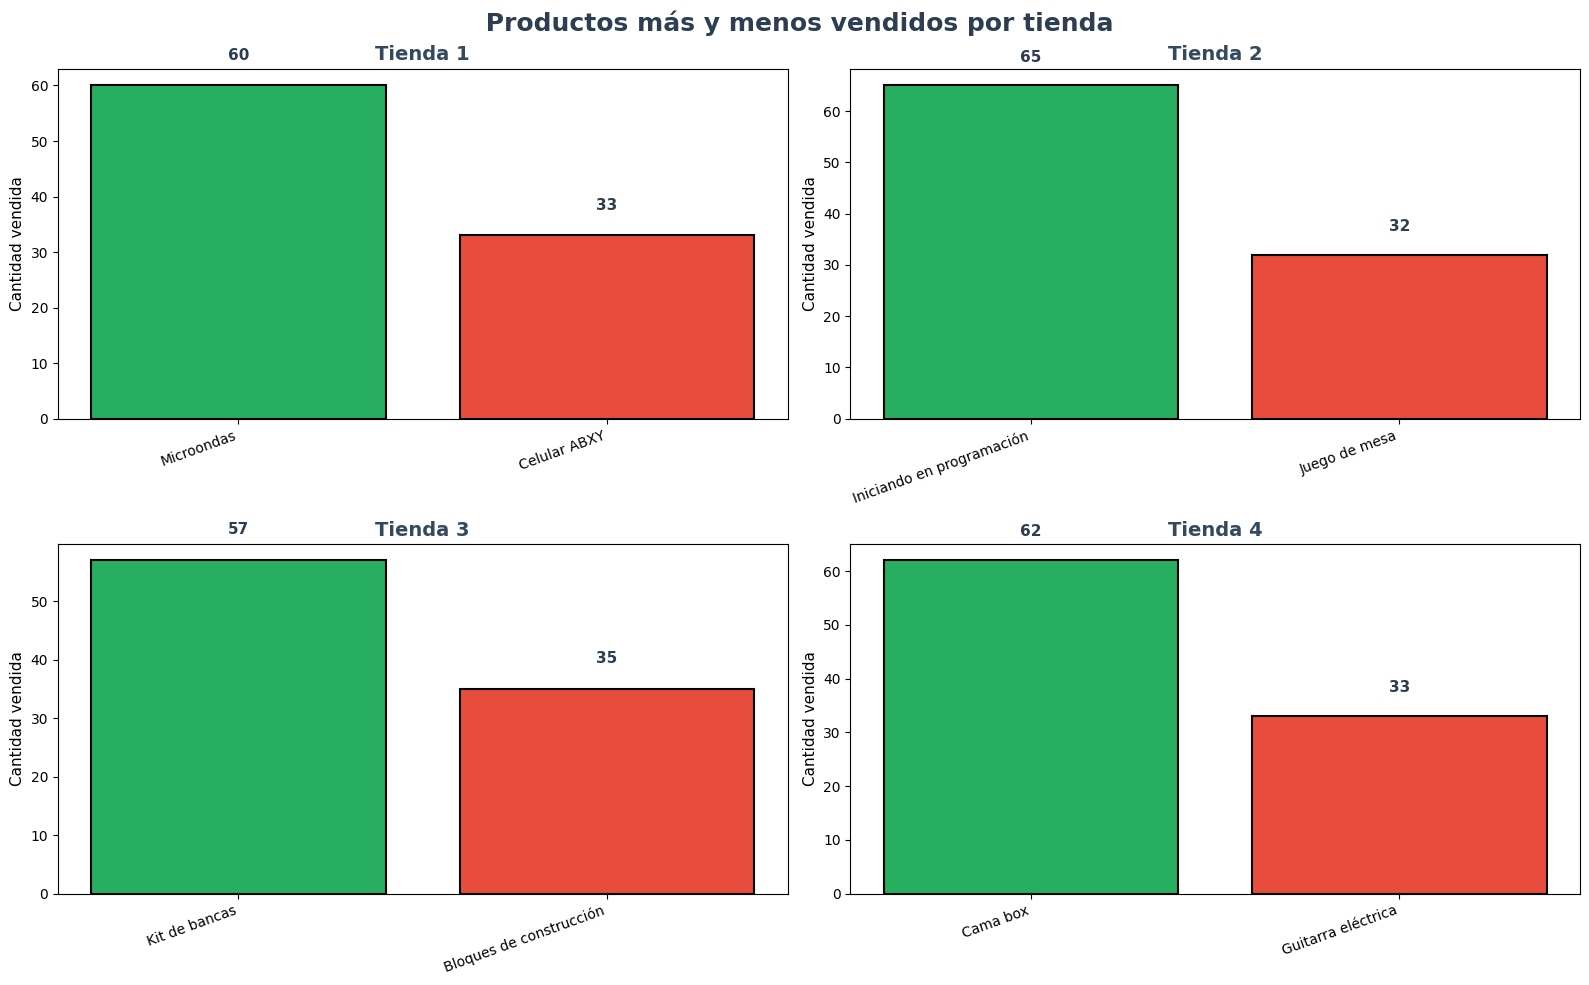

In [87]:

plt.figure(figsize=(16, 10))
plt.suptitle(' Productos más y menos vendidos por tienda', fontsize=18, fontweight='bold', color='#2c3e50')

# Diccionario con las tiendas y sus DataFrames
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Colores representativos
color_mas_vendido = '#27ae60'  # Verde
color_menos_vendido = '#e74c3c'  # Rojo

for i, (nombre, df) in enumerate(tiendas.items()):
    # Contar los productos vendidos
    conteo_productos = df['Producto'].value_counts()

    # Seleccionar el más y el menos vendido
    mas_vendido = conteo_productos.index[0]
    mas_vendido_cant = conteo_productos.iloc[0]
    menos_vendido = conteo_productos.index[-1]
    menos_vendido_cant = conteo_productos.iloc[-1]

    productos = [mas_vendido, menos_vendido]
    cantidades = [mas_vendido_cant, menos_vendido_cant]

    # Subgráfico por tienda
    plt.subplot(2, 2, i + 1)
    barras = plt.bar(productos, cantidades, color=[color_mas_vendido, color_menos_vendido],
                     edgecolor='black', linewidth=1.5)

    # Título y etiquetas
    plt.title(f"{nombre}", fontsize=14, fontweight='bold', color='#34495e')
    plt.ylabel('Cantidad vendida', fontsize=11)
    plt.xticks(rotation=20, ha='right', fontsize=10)

    # Etiquetas numéricas sobre las barras
    for bar in barras:
        altura = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, altura + 4,
                 f'{int(altura)}',
                 ha='center', va='bottom', fontsize=11, fontweight='bold', color='#2c3e50')

    # Agregar etiquetas de interpretación
    plt.text(-0.35, max(cantidades) * 0.9, ' ', color=color_mas_vendido, fontsize=10, fontweight='bold')
    plt.text(0.65, max(cantidades) * 0.9, ' ', color=color_menos_vendido, fontsize=10, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# 💾 Guardar el gráfico como imagen PNG
plt.tight_layout()
plt.savefig('grafico4_productos_mas_vendido_menos_vendido.png', dpi=300, bbox_inches='tight')

plt.show()

####Cada tienda tiene productos que se venden mejor que otros, lo que muestra que los clientes buscan cosas diferentes en cada lugar.Juan puede aprovechar esto promocionando lo que más se vende y ofreciendo descuentos o cambios de precio en lo que se vende menos, para mover mejor el inventario y ganar más dinero.

# 5. Envío promedio por tienda

In [89]:
envios = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

for tienda, envio in envios.items():
    print(f"{tienda}: ${envio:,.0f} COP promedio")

print(f"\n💸 Tienda con envío MÁS CARO: {max(envios, key=envios.get)}")
print(f"💰 Tienda con envío MÁS BARATO: {min(envios, key=envios.get)}")


Tienda 1: $26,019 COP promedio
Tienda 2: $25,216 COP promedio
Tienda 3: $24,806 COP promedio
Tienda 4: $23,459 COP promedio

💸 Tienda con envío MÁS CARO: Tienda 1
💰 Tienda con envío MÁS BARATO: Tienda 4


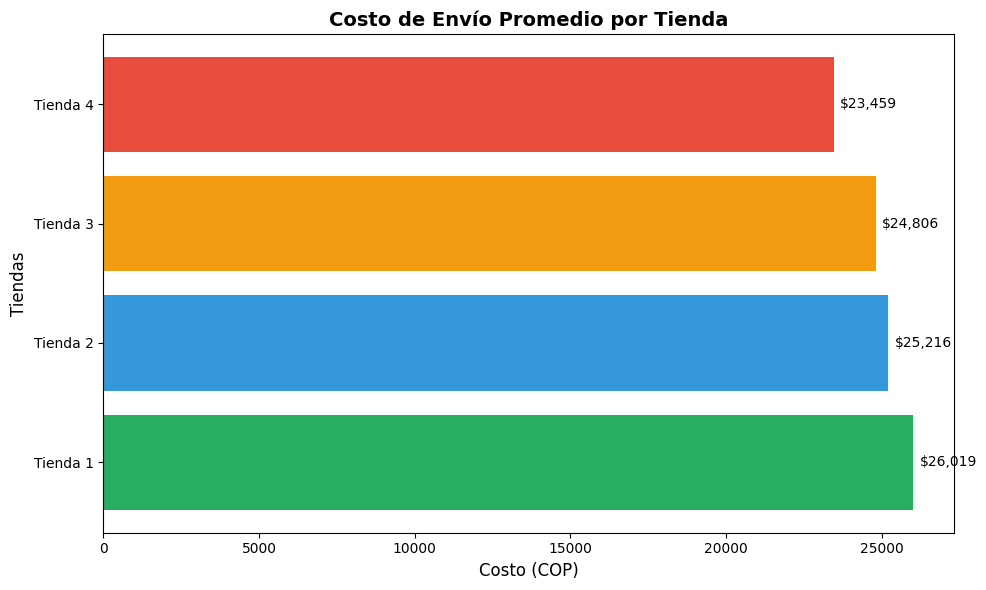

In [90]:


plt.figure(figsize=(10,6))

valores_envio = list(envios.values())
tiendas_list = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear gráfico de barras horizontales
bars = plt.barh(tiendas_list, valores_envio, color=colores)

# Títulos y ejes
plt.title('Costo de Envío Promedio por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Costo (COP)', fontsize=12)
plt.ylabel('Tiendas', fontsize=12)

# Etiquetas con valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 200,                      # Desplazamiento a la derecha
             bar.get_y() + bar.get_height()/2, # Posición vertical centrada
             f'${width:,.0f}',                 # Formato COP
             va='center', fontsize=10)

# Ajustar formato y guardar imagen
plt.tight_layout()
plt.savefig('grafico5_envios.png', dpi=300, bbox_inches='tight')
plt.show()


#### **Sr juan** La Tienda 4 genera menos ingreso por envíos, ya que tiene el costo de envío más bajo. En cambio, la Tienda 1 obtiene más ingreso por cada envío gracias a su tarifa más alta.

In [96]:
%cd /content/drive/MyDrive/Primer\ Challenge\ Alura\ Store


/content/drive/MyDrive/Primer Challenge Alura Store


In [97]:
!git clone https://github.com/jordannegria/Challenge-Alura-Store.git
%cd Challenge-Alura-Store


Cloning into 'Challenge-Alura-Store'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 4.24 KiB | 619.00 KiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/drive/MyDrive/Primer Challenge Alura Store/Challenge-Alura-Store


# 6.Conclusión y Recomendación



<div style="background-color:#e9f7ef; border-left:6px solid #27ae60; padding:16px; border-radius:10px;">
  <p style="font-size:17px;">
  Estimado <b>Sr. Juan</b>, luego de analizar el rendimiento de sus cuatro tiendas, encontramos los siguientes resultados generales:
  </p>

  <ul style="font-size:16px;">
    <li>💰 <b>Tienda 1</b>: Genera los <b>mayores ingresos</b> ($1,150,880,400 COP), aunque sus clientes son los menos satisfechos (3.98⭐) y el envío es el más costoso.</li>
    <li>⚖️ <b>Tienda 2</b>: Mantiene un <b>desempeño estable</b>, con buenos ingresos ($1,116,343,500 COP), calificación positiva (4.04⭐) y costos de envío moderados.</li>
    <li>⭐ <b>Tienda 3</b>: Tiene la <b>mejor calificación de clientes</b> (4.05⭐), buenos ingresos ($1,098,019,600 COP) y un envío competitivo; representa el <b>equilibrio ideal</b> entre ventas y satisfacción.</li>
    <li>📉 <b>Tienda 4</b>: Es la <b>que genera menos ingresos</b> ($1,038,375,700 COP) y ofrece los <b>envíos más baratos</b>, reduciendo su margen de ganancia.</li>
  </ul>

  <p style="font-size:17px;">
  En conjunto, sus tiendas muestran un negocio sólido, pero la <b>Tienda 4</b> destaca como la <b>menos rentable</b> y con menor aporte económico general.
  </p>
</div>

---

<div style="background-color:#fef9e7; border-left:6px solid #f1c40f; padding:16px; border-radius:10px;">
  <h3>✅ Recomendación general</h3>
  <p style="font-size:17px;">
  <b>Sr. Juan</b>, le sugerimos vender la <b>Tienda 4</b>, ya que presenta los <b>menores ingresos</b> y <b>menor ganancia por envío</b>.  
  Esto le permitirá <b>recuperar capital</b> para invertir en nuevas oportunidades o fortalecer sus tiendas con mejor desempeño:
  </p>

  <ul style="font-size:16px;">
    <li> <b>Tienda 1</b>: Más rentable por ingresos totales.</li>
    <li> <b>Tienda 2</b>: Estable y confiable, con buen equilibrio general.</li>
    <li> <b>Tienda 3</b>: La preferida por los clientes y con desempeño constante.</li>
  </ul>
</div>

---

<h3>📊 Resumen general del análisis</h3>

| Criterio | Tienda con mejor resultado | Tienda con peor resultado |
|-----------|-----------------------------|----------------------------|
| 💰 Ingresos totales | 🥇 Tienda 1 | 🚫 <b>Tienda 4</b> |
| ⭐ Calificación de clientes | 🥇 Tienda 3 | Tienda 1 |
| 🚚 Costo promedio de envío | 🥇 Tienda 1 (más caro) | 🚫 <b>Tienda 4 (más barato)</b> |
| ⚖️ Equilibrio general | 🟡 Tienda 2 | — |
| 🧾 Recomendación final | — | ✅ <b>Vender la Tienda 4</b> |

---

<div style="background-color:#f5eef8; border-left:6px solid #8e44ad; padding:16px; border-radius:10px;">
  <h3>💡 Conclusión final</h3>
  <p style="font-size:17px;">
  <b>Sr. Juan</b>, sus tiendas tienen un rendimiento positivo en general, pero los datos muestran que la <b>Tienda 4</b> es la menos rentable.  
  Venderla le permitirá liberar recursos y concentrarse en las tres tiendas con mayor potencial:  
  <b>Tienda 1</b> por su volumen de ventas, <b>Tienda 2</b> por su estabilidad, y <b>Tienda 3</b> por su excelente reputación con los clientes.  
  </p>
</div>

---

<h4 align="center">📈 “Analizar los datos le permite decidir con seguridad y crecer con estrategia.”</h4>
